In [70]:
from matplotlib import pyplot as plt
from pandas import DataFrame, read_excel, pivot_table
import numpy as np

In [61]:
# 폰트 설정
plt.rcParams['font.family'] = "Malgun Gothic"
# 글자 크기
plt.rcParams['font.size'] = 12
# 그래프 크기 설정(inch) inch 의 감이 없으니까 걍 inch [10,5]로 잡고 늘렸다가 줄였다가 하세욤
plt.rcParams['figure.figsize'] = (20,5)
# 유니코드에서 음수 부호 설정 (안하면 D로 표기됨)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 시각화 연습문제 (1)

## 문제1

다음 데이터는 `2021년 06월 01일`부터 `2023년 06월 30일`까지의 비트코인 시세 데이터의 일부이다.

| 날짜         | 종가      | 시가      | 고가      | 저가      | 거래량     | 변동 %   |
|------------|---------|---------|---------|---------|---------|--------|
| 2021-06-01 | 36,688  | 37,294  | 37,850  | 35,743  | 113.48K | -1.64% |
| 2021-06-02 | 37,556  | 36,688  | 38,200  | 35,981  | 96.89K  | 2.37%  |
| 2021-06-03 | 39,187  | 37,556  | 39,462  | 37,194  | 106.44K | 4.34%  |
| 2021-06-04 | 36,851  | 39,191  | 39,255  | 35,660  | 127.71K | -5.96% |
| 2021-06-05 | 35,520  | 36,841  | 37,888  | 34,832  | 101.48K | -3.61% |
| 2021-06-06 | 35,815  | 35,519  | 36,434  | 35,265  | 62.20K  | 0.83%  |

전체 데이터는 아래의 URL에서 얻을 수 있다.

> https://data.hossam.kr/bitcoin.xlsx

이 데이터를 활용하여 날짜별 종가와 시가가 어떻게 변화하고 있는지 보여주고자 한다. 단, x축의 간격을 10일 간격으로 설정하여 구현하시오.

In [241]:
df = read_excel('https://data.hossam.kr/bitcoin.xlsx')
df

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2021-06-01,36687.6,37294.3,37850.3,35742.7,113.48K,-0.0164
1,2021-06-02,37555.8,36687.7,38199.9,35981.1,96.89K,0.0237
2,2021-06-03,39187.3,37555.7,39462.3,37193.6,106.44K,0.0434
3,2021-06-04,36851.3,39191.4,39255.4,35659.9,127.71K,-0.0596
4,2021-06-05,35520.0,36841.2,37887.6,34832.0,101.48K,-0.0361
...,...,...,...,...,...,...,...
755,2023-06-26,30267.0,30466.3,30645.9,29986.3,58.71K,-0.0065
756,2023-06-27,30689.1,30267.0,30993.7,30231.3,55.82K,0.0139
757,2023-06-28,30078.6,30691.9,30703.4,29919.5,51.06K,-0.0199
758,2023-06-29,30445.7,30077.3,30823.1,30051.3,49.57K,0.0122


In [264]:
xlables = list(df['날짜'])
x = np.array(range(0,len(xlables)))
x


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [265]:
# y축 데이터
ylables1 = list(df['종가'])
# y1 = list(np.array(range(0,len(ylables1),10)))
ylables2 = list(df['시가'])
# y2 = np.array(range(0,len(ylables2),10))
ylables1

[36687.6,
 37555.8,
 39187.3,
 36851.3,
 35520.0,
 35815.4,
 33578.0,
 33382.9,
 37332.2,
 36649.4,
 37314.6,
 35467.5,
 39022.9,
 40529.4,
 40156.1,
 38336.0,
 38052.0,
 35749.4,
 35513.4,
 35595.8,
 31692.0,
 32496.4,
 33674.3,
 34665.8,
 31594.0,
 32243.4,
 34678.5,
 34475.9,
 35834.7,
 35026.9,
 33543.6,
 33813.4,
 34742.8,
 35298.2,
 33687.8,
 34225.6,
 33867.8,
 32866.3,
 33797.4,
 33510.6,
 34227.7,
 33113.0,
 32728.1,
 32820.7,
 31840.5,
 31394.0,
 31518.6,
 31785.4,
 30837.2,
 29793.8,
 32131.4,
 32298.9,
 33603.3,
 33824.8,
 35391.1,
 37276.6,
 39452.0,
 40003.2,
 40001.4,
 42203.4,
 41553.7,
 39878.3,
 39168.4,
 38130.3,
 39736.9,
 40867.2,
 42795.4,
 44614.2,
 43792.8,
 46284.3,
 45593.8,
 45564.3,
 44403.4,
 47809.1,
 47081.5,
 46991.3,
 45996.3,
 44691.6,
 44723.8,
 46755.9,
 49324.0,
 48875.8,
 49254.5,
 49539.7,
 47714.7,
 48994.5,
 46831.6,
 49064.3,
 48897.1,
 48777.4,
 46992.7,
 47130.4,
 48819.4,
 49274.3,
 49999.0,
 49918.4,
 51768.6,
 52672.1,
 46779.6,
 46061.4,


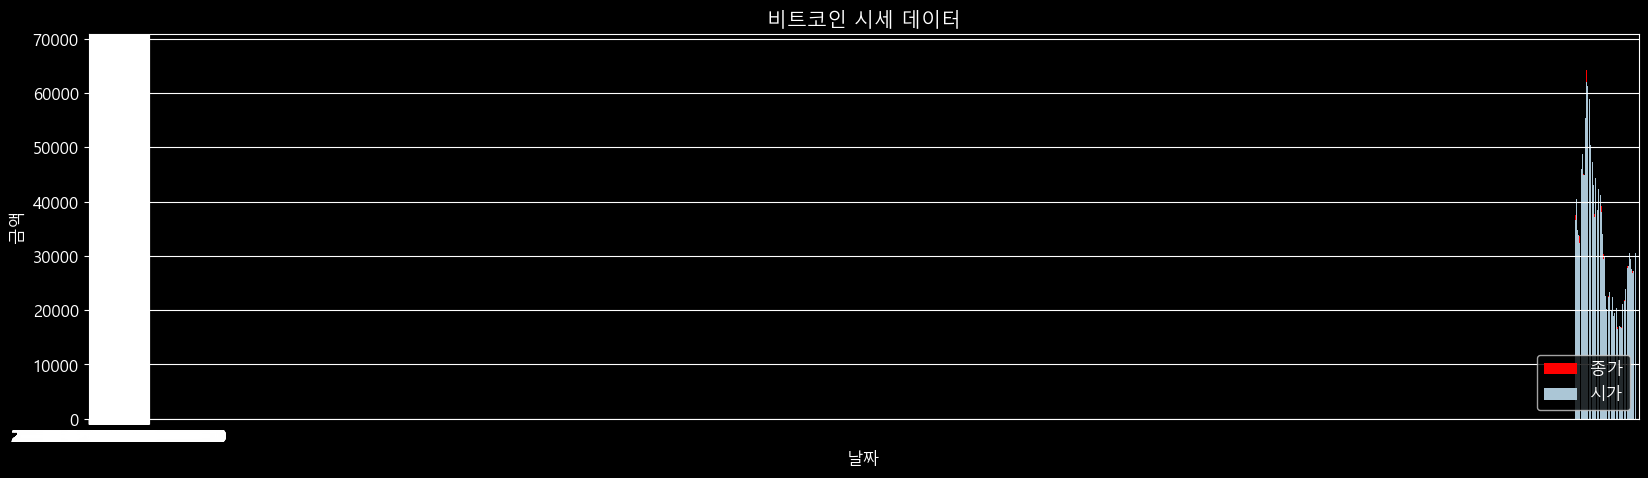

In [267]:
# 그래프 그리기
plt.figure()
plt.title('비트코인 시세 데이터')
# 각 막대의 색상을 단색으로 지정
plt.bar(xlables,ylables1,color='red',label='종가')
plt.bar(xlables,ylables2,color='#abc6d6',label='시가')
plt.xlabel('날짜')
plt.ylabel('금액')
plt.grid()
plt.legend(loc='lower right')
plt.xticks(x,xlables)
plt.show()
plt.close()

## 문제2

다음 데이터는 서울시의 행정구역별 노인복지시설의 수를 조사한 자료의 일부이다.

| 지역명          | 복지시설 |
|--------------|------|
| Jongno-gu    | 61   |
| Jung-gu      | 53   |
| Yongsan-gu   | 110  |
| Seongdong-gu | 155  |
| Gwangjin-gu  | 103  |

전체 데이터는 아래의 URL에서 얻을 수 있다.

> https://data.hossam.kr/senior_lsf.xlsx

복지시설이 많은 상위 10개 지역에 대한 지역별 복지 시설 수를 시각화 하시오.

In [46]:
df = read_excel('https://data.hossam.kr/senior_lsf.xlsx')
df

,지역명,복지시설
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103
5,Dongdaemun-gu,146
6,Jungnang-gu,128
7,Seongbuk-gu,158
8,Gangbuk-gu,111
9,Dobong-gu,139


In [54]:
#복지시설이 많은 상위 10개 지역에 대한 지역별 복지 시설 수를 시각화 하시오.
복지 = df.sort_values('복지시설',ascending=False)
복지상위 = 복지.head(10)
복지상위

,지역명,복지시설
10,Nowon-gu,252
15,Gangseo-gu,215
18,Yeongdeungpo-gu,208
16,Guro-gu,192
14,Yangcheon-gu,192
22,Gangnam-gu,184
23,Songpa-gu,173
13,Mapo-gu,160
7,Seongbuk-gu,158
3,Seongdong-gu,155


In [59]:
xlables = list(복지상위['지역명'])
ylables = list(복지상위['복지시설'])

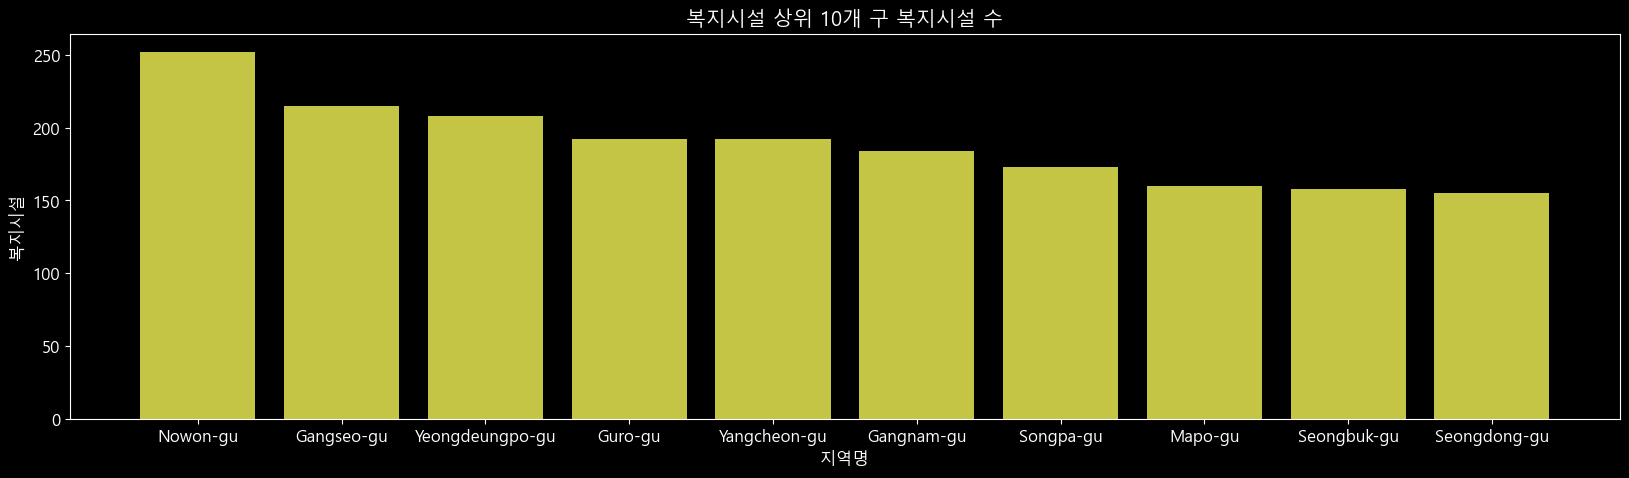

In [62]:
x = xlables
y = ylables
plt.figure()
plt.title('복지시설 상위 10개 구 복지시설 수')

# 각 막대의 색상을 단색으로 지정
plt.bar(x,y,color ='#c4c445')
plt.xlabel('지역명')
plt.ylabel('복지시설')

plt.show()
plt.close()

## 문제3

다음 데이터는 도시별 인수수를 5개년도 단위로 조사한 가상의 자료이다.

> https://data.hossam.kr/city_people.xlsx

| 도시 | 연도   | 인구      | 지역  |
|----|------|---------|-----|
| 서울 | 2015 | 9904312 | 수도권 |
| 서울 | 2010 | 9631482 | 수도권 |
| 서울 | 2005 | 9762546 | 수도권 |
| 부산 | 2015 | 3448737 | 경상권 |
| 부산 | 2010 | 3393191 | 경상권 |
| 부산 | 2005 | 3512547 | 경상권 |
| 인천 | 2015 | 2890451 | 수도권 |
| 인천 | 2010 | 2632035 | 수도권 |

각 도시별로 2015년도의 2010년도의 인구수를 비교하는 자료를 시각화 하시오.

단, 인구수의 표현 범위는 200만~1000만으로 한다.

In [233]:
df = read_excel('https://data.hossam.kr/city_people.xlsx')
df

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [234]:
df1 = df.drop('지역',axis=1)
df2 = df1.set_index('연도')
df3 = df2.transpose()
df4 = df3.drop(2005,axis=1)
df5 = df4.transpose()
df5

,도시,인구
연도,,
2015,서울,9904312
2010,서울,9631482
2015,부산,3448737
2010,부산,3393191
2015,인천,2890451
2010,인천,2632035


In [235]:
df6 = pivot_table(df5,
            index='도시', 
            columns='연도', 
            values='인구',
            aggfunc='mean' # 통계학적 의미의 평균
)
df6

연도,2010,2015
도시,,
부산,3393191.0,3448737.0
서울,9631482.0,9904312.0
인천,2632035.0,2890451.0


In [236]:
x_rables=list(df6.index)
x_rables

['부산', '서울', '인천']

In [237]:
x = np.array(range(0,len(x_rables)))

In [238]:
# y축 데이터
y1 = list(df6[2010])
y2 = list(df6[2015])
y1

[3393191.0, 9631482.0, 2632035.0]

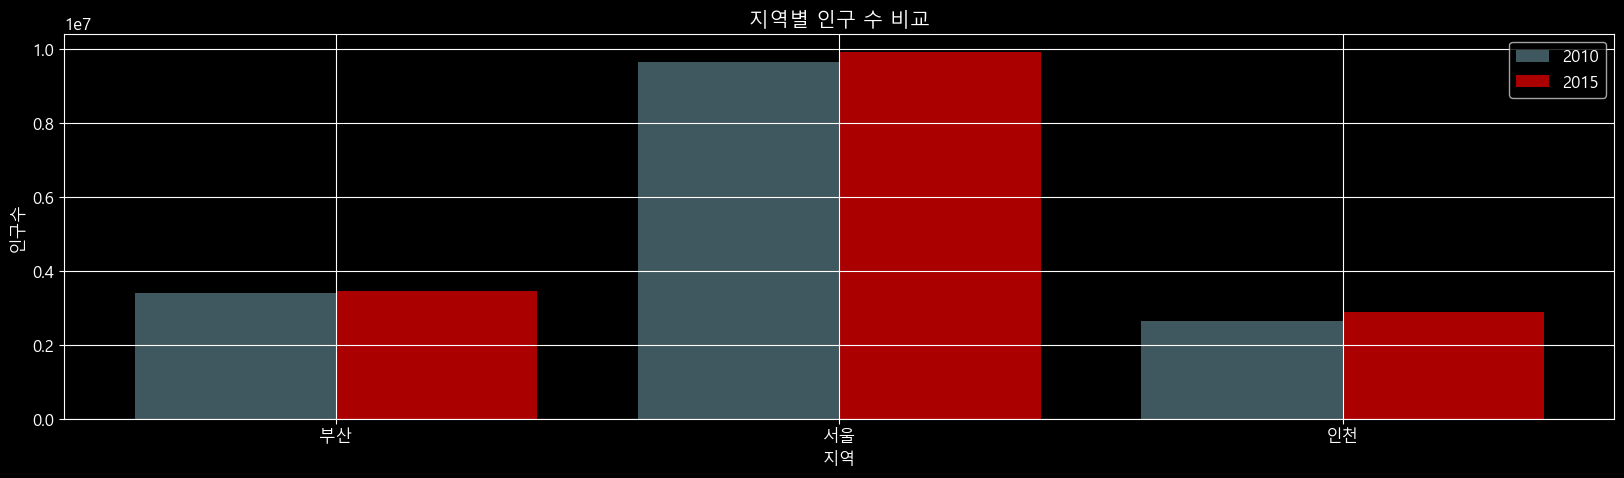

In [239]:
# 그래프 그리기
plt.figure()
plt.title('지역별 인구 수 비교')
# 각 막대의 색상을 단색으로 지정
plt.bar(x-0.2,y1,color='#3f575e',label='2010',width=0.4)
plt.bar(x+0.2,y2,color='#ab0000',label='2015',width=0.4)

plt.xlabel('지역')
plt.ylabel('인구수')
plt.grid()
plt.legend()
plt.xticks(x,x_rables)
plt.show()
plt.close()


## 문제4

다음 데이터는 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터이다.

이 데이터에 대해 아래의 요구사항을 충족하는 시각화 결과물을 구현하시오.

> https://data.hossam.kr/jobs_by_scale.xlsx

| 종사자규모별   | 2015  | 2016  |
|----------|-------|-------|
| 1~4명     | 553.5 | 576.7 |
| 5~9명     | 211.6 | 216.8 |
| 10~29명   | 194.7 | 195.5 |
| 30~49명   | 227.4 | 227.4 |
| 50~99명   | 152.8 | 155.7 |
| 100~199명 | 221.9 | 220.6 |
| 200~299명 | 80.9  | 81    |
| 300~999명 | 100.5 | 99.3  |
| 1000명 이상 | 557.6 | 549.7 |

### 요구사항 1

종사자 규모에 따른 업체 수를 확인할 수 있는 세로 막대 그래프를 구현하시오. 이 때 각 데이터의 범주는 년도로 설정하시오.

### 요구사항 2

종사자 규모별 업체 수의 비율을 시각화 하시오. 2015년도와 2016년도에 대한 시각화 결과물이 각각(총 2개) 구현되어야 합니다.

In [220]:
df = read_excel('https://data.hossam.kr/jobs_by_scale.xlsx')
df

,종사자규모별,2015,2016
0,1~4명,553.5,576.7
1,5~9명,211.6,216.8
2,10~29명,194.7,195.5
3,30~49명,227.4,227.4
4,50~99명,152.8,155.7
5,100~199명,221.9,220.6
6,200~299명,80.9,81.0
7,300~999명,100.5,99.3
8,1000명 이상,557.6,549.7


문제 1 ) 종사자 규모에 따른 업체 수를 확인할 수 있는 세로 막대 그래프를 구현하시오. 이 때 각 데이터의 범주는 년도로 설정하시오.

In [221]:
# x축에 표시할 텍스트
xlables = list(df['종사자규모별'])

x = np.array(range(0,len(xlables)))
xlables

['1~4명',
 '5~9명',
 '10~29명',
 '30~49명',
 '50~99명',
 '100~199명',
 '200~299명',
 '300~999명',
 '1000명 이상']

In [222]:
# y축 데이터
y1 = list(df[2015])
y2 = list(df[2016])
y1

[553.5, 211.6, 194.7, 227.4, 152.8, 221.9, 80.9, 100.5, 557.6]

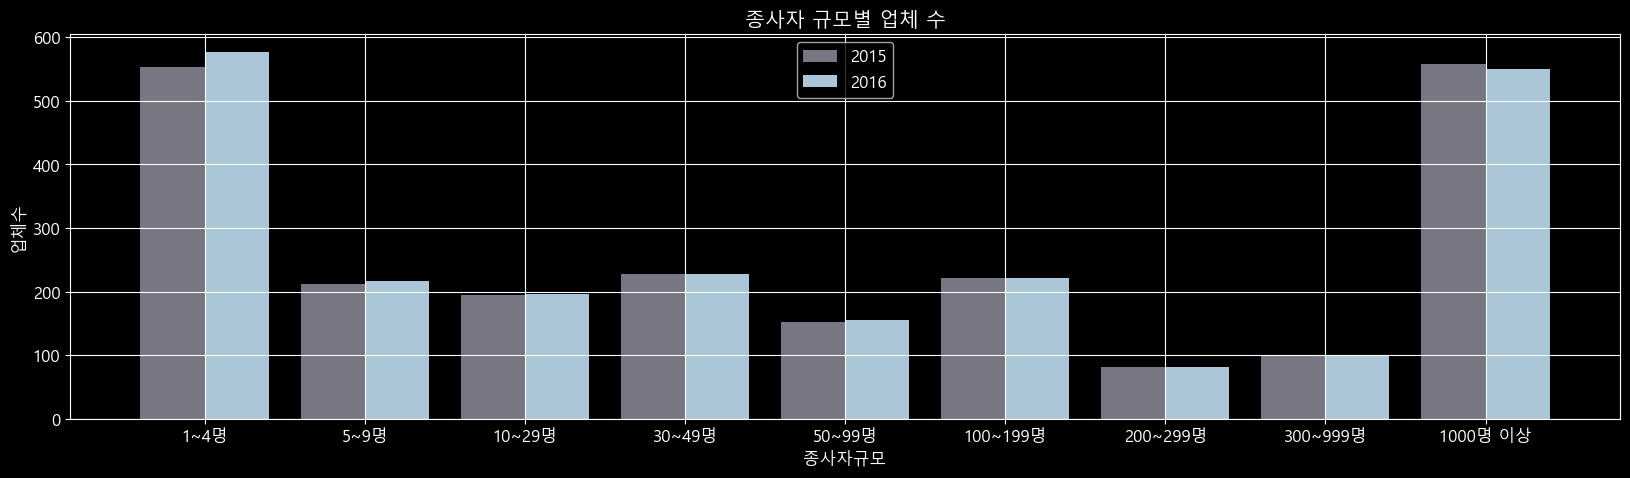

In [133]:
# 그래프 그리기
plt.figure()
plt.title('종사자 규모별 업체 수')
plt.bar(x-0.2,y1,color='#767782',label='2015',width=0.4)
plt.bar(x+0.2,y2,color='#abc6d6',label='2016',width=0.4)
plt.xlabel('종사자규모')
plt.ylabel('업체수')
plt.grid()
plt.legend()
plt.xticks(x,xlables)
plt.show()
plt.close()

요구사항 2 ) 종사자 규모별 업체 수의 비율을 시각화 하시오. 2015년도와 2016년도에 대한 시각화 결과물이 각각(총 2개) 구현되어야 합니다.

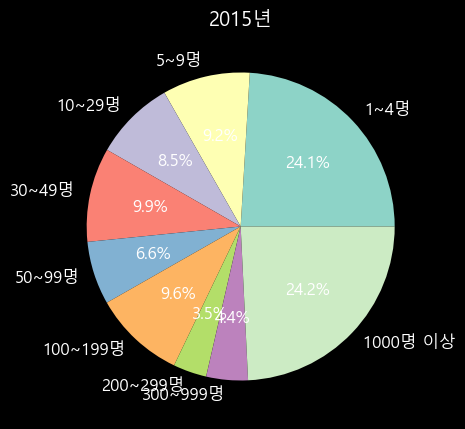

In [225]:
# 데이터
data = y1
# 각 데이터별 레이블 
lables = xlables
# 각 데이터별 색상
colors = ['#fcd2f3','#00bef7','#8f6f50','#c3d2de']
# 각 데이터별 확대비율
explode = (0,0.1,0,0)

plt.figure()
plt.title('2015년')
plt.pie(data,labels=lables,autopct="%0.1f%%")
plt.show()
plt.close()

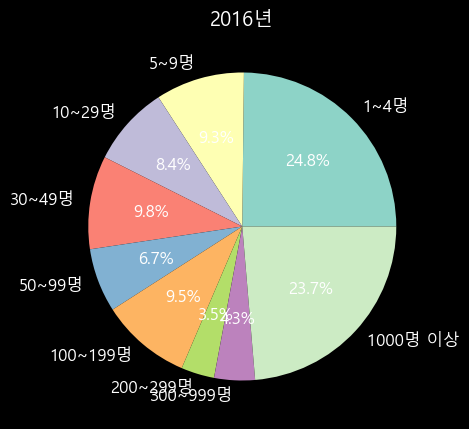

In [224]:
# 데이터
data = y2
# 각 데이터별 레이블 
lables = xlables
# 각 데이터별 색상
colors = ['#fcd2f3','#00bef7','#8f6f50','#c3d2de']
# 각 데이터별 확대비율
explode = (0,0.1,0,0)

plt.figure()
plt.title('2016년')
plt.pie(data,labels=lables,autopct="%0.1f%%")
plt.show()
plt.close()


## 문제 5

아래의 데이터는 2002년도부터 2018년도까지 월별 교통사고의 발생건수, 사망자수, 부상자수를 조사한 데이터의 일부이다.

| 년도   | 월 | 발생건수   | 사망자수 | 부상자수   |
|------|---|--------|------|--------|
| 2005 | 1 | 15494  | 504  | 25413  |
| 2005 | 2 | 13244  | 431  | 21635  |
| 2005 | 3 | 16580  | 477  | 25550  |
| 2005 | 4 | 17817  | 507  | 28131  |
| 2005 | 5 | 19085  | 571  | 29808  |
| 2005 | 6 | 18092  | 476  | 28594  |

전체 데이터는 아래의 URL을 통해 확인할 수 있다.

> https://data.hossam.kr/traffic_acc.xlsx

교통사고 발생건수와 부상자수의 상관관계를 알아보고자 한다. 적합한 시각화 결과물을 제시하시오.

In [143]:
df = read_excel('https://data.hossam.kr/traffic_acc.xlsx')
df

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


In [146]:
# x축에 표시할 텍스트
발생건수 = list(df['발생건수'])
부상자수 = list(df['부상자수'])

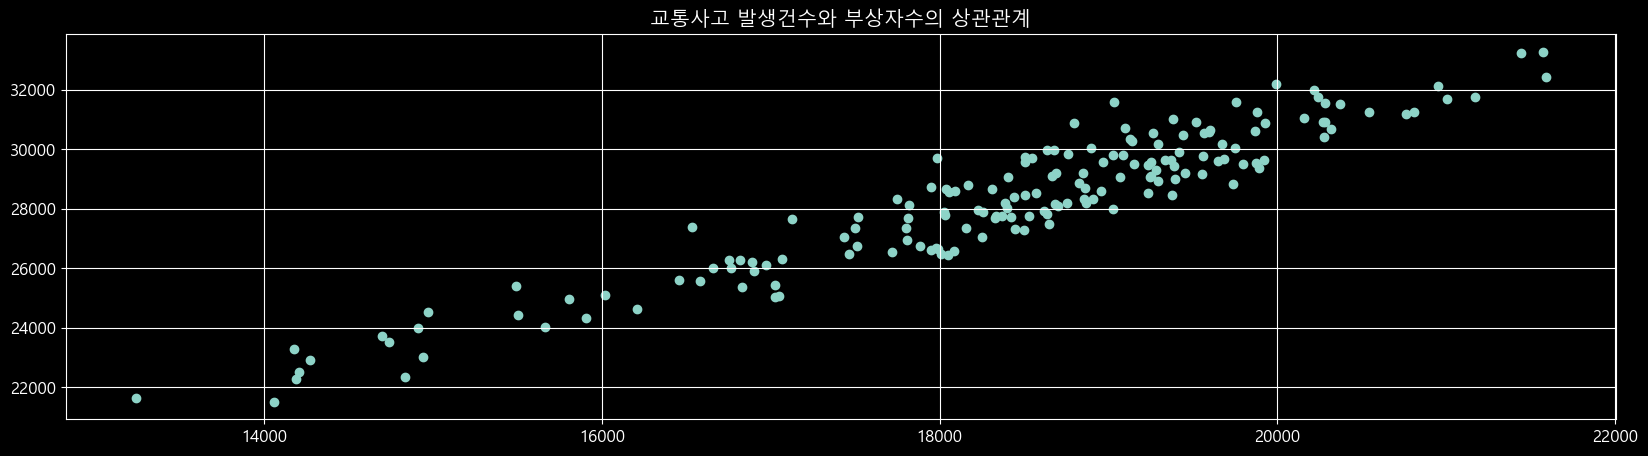

In [148]:
#교통사고 발생건수와 부상자수의 상관관계를 알아보고자 한다. 적합한 시각화 결과물을 제시하시오.
plt.figure()
plt.title("교통사고 발생건수와 부상자수의 상관관계")
plt.scatter(발생건수, 부상자수)
plt.grid()
plt.show()
plt.close()